<a href="https://colab.research.google.com/github/tomacro/IntroDataScience/blob/master/Development_Platforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now that we have looked at the popularity of programming languages, we will now look at if developers are changing platforms for which they are developing for each year. Many languages are applicable to multiple platforms, especially if a developer specializes in back-end interfaces. We will illustrate some principles of the CRISP-DM (Cross-industry standard process for data mining) model for our analysis as well.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Using the Pandas, Numpy, and MatPlotLib libraries

Now we will bring in the datasets from the appropriate years.

In [7]:
# Importing survey results
df_17 = pd.read_csv('data/2017_survey_results_public.csv')
df_18 = pd.read_csv('data/2018_survey_results_public.csv')
df_19 = pd.read_csv('data/2019_survey_results_public.csv')
df_20 = pd.read_csv('data/2020_survey_results_public.csv')

**CRISP-DM: Business Understanding**

There are several different types of IDEs available for use. Some are open source and available for free, while others may have a significant cost associated with them but also have significantly more features. It is important to know what the industry trends are and how they change.

**CRISP-DM: Data Understanding**

In [11]:
df_20['PlatformWorkedWith'].value_counts().reset_index()

,index,PlatformWorkedWith
0,Windows,1234
1,Linux;Windows,594
2,Linux,482
3,Android,316
4,Microsoft Azure;Windows,287
...,...,...
2830,Android;AWS;Heroku;Linux;MacOS;Windows,1
2831,Android;Arduino;AWS;Docker;Kubernetes;Linux;Wo...,1
2832,Android;AWS;Docker;Slack Apps and Integrations...,1
2833,Arduino;AWS;Linux;MacOS;Microsoft Azure;WordPress,1


The datasets provided by Stack Overflow show that developers frequently use several languages. We will need to separate those before we conduct any more analysis.

**CRISP-DM: Data Preparation**

Since we are working with 4 separate data frames, we should build a function that will enable us to separate items from a list. This enables us to efficiently use coding and computing resources with reusable code.

In [13]:
def separate_list(list_input):
    '''
    INPUT - A list containing multiple items joined together.

    OUTPUT - A list containing the items separated out individually.
    '''
    list_new = []
    for language in list_input:
        new_item = language.split(';')
        new_item = map(lambda x: x.strip(), new_item) 
        list_new.extend(list(new_item))

    return list(set(list_new))

Now that we have a function that can effectively process our data to get it into the format that we need, let's build the variables we need for our analysis.

In [26]:
platform_list_17 = list(df_17.groupby(['HaveWorkedPlatform']).mean().index)
plats_17 = separate_list(platform_list_17)
platform_list_18 = list(df_18.groupby(['PlatformWorkedWith']).mean().index)
plats_18 = separate_list(platform_list_18)
platform_list_19 = list(df_19.groupby(['PlatformWorkedWith']).mean().index)
plats_19 = separate_list(platform_list_19)
platform_list_20 = list(df_20.groupby(['PlatformWorkedWith']).mean().index)
plats_20 = separate_list(platform_list_20)

We will use the `total_count` function to parse through these data frames to provide a summation of the instances of each platform.

In [28]:
def total_count(df, column_1, column_2, rename_column, possible_vals):
    '''
    Code from: https://github.com/nouman-10/Insights-from-Stackoverflow-Dataset/blob/master/utils.py
    INPUT:
    df - the pandas dataframe you want to search
    column_1 - the column name you want to look through
    column_2 - the column you want to count values from
    rename_column - the column you want the original column_1 renamed to
    possible_vals - a list of strings you want to search for in each row of df[col]
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    df = df[column_1].value_counts().reset_index()
    df.rename(columns={'index': rename_column, column_1: column_2}, inplace=True)
    new_df = defaultdict(int)
    #loop through list of possible values
    for val in possible_vals:
        #loop through rows
        for index in range(df.shape[0]):
            if val in df[rename_column][index]:
                new_df[val] += int(df[column_2][index])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [rename_column, column_2]
    new_df.sort_values('count', ascending=False, inplace=True)
    new_df.set_index(rename_column, inplace=True)
    return new_df

In [29]:
plats_df17 = total_count(df_17, 'HaveWorkedPlatform', 'count', 'Platform', plats_17)
plats_df18 = total_count(df_18, 'PlatformWorkedWith', 'count', 'Platform', plats_18)
plats_df19 = total_count(df_19, 'PlatformWorkedWith', 'count', 'Platform', plats_19)
plats_df20 = total_count(df_20, 'PlatformWorkedWith', 'count', 'Platform', plats_20)

In [30]:
plats_df20.head()

,count
Platform,
Linux,7337
Windows,7299
Docker,4758
AWS,3810
Android,3619


Now that our data is in the correct format, we can utilize a bar plot to compare the survey responses visually. To do this, we first need to create a new data frame combining the data from the four years.

In [32]:
plats_17_18 = pd.merge(plats_df17, plats_df18, on='Platform')
plats_19_20 = pd.merge(plats_df19, plats_df20, on='Platform')
plats_merge = pd.merge(plats_17_18, plats_19_20, on='Platform')
plats_merge.columns = ['2017', '2018', '2019', '2020']

plats_merge.head()

,2017,2018,2019,2020
Platform,,,,
Android,1506,1563,2535,3619
iOS,941,893,1224,1792
Raspberry Pi,854,853,1411,2010
WordPress,743,856,1348,1934
Arduino,506,510,1039,1328


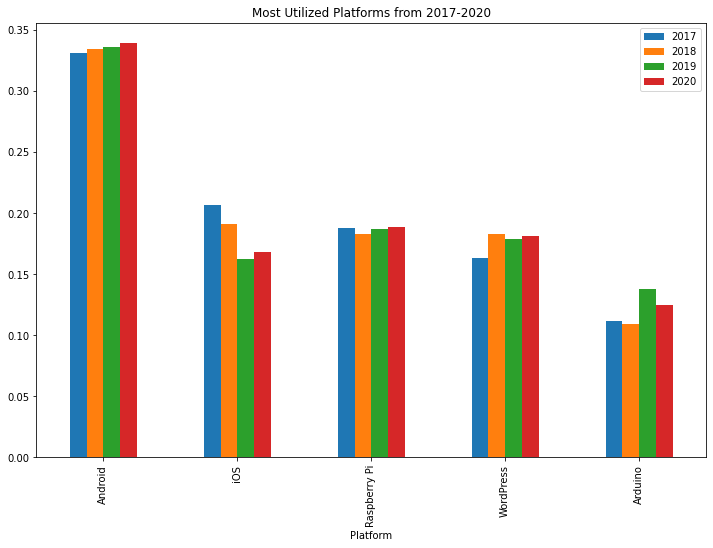

In [36]:
(plats_merge/plats_merge.sum()).plot(kind='bar', title='Most Utilized Platforms from 2017-2020', figsize=(12,8))

**CRISP-DM: Evaluation**

From the bar plot, we can see that the most popular platforms over the past 4 years are mobile devices (iOS and Android), Internet of Things (IoT) devices, and blogging. However, is there some inherent bias in the presentation of the data?  Let's split the plot into two-year blocks.

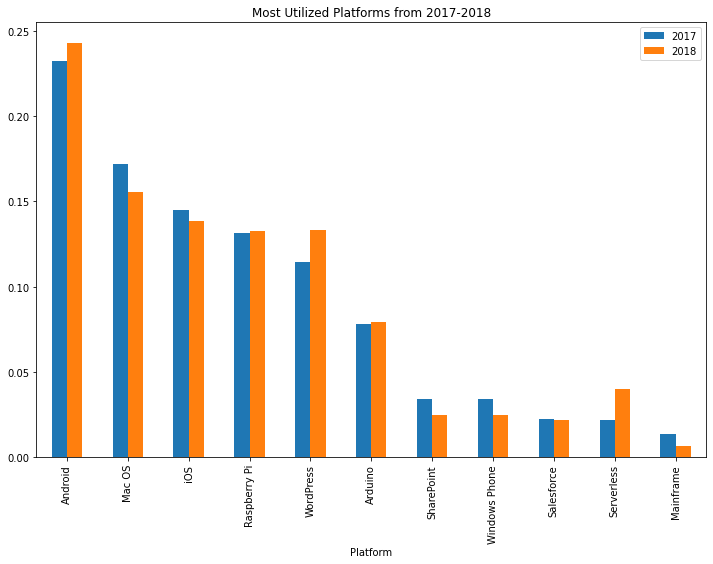

In [41]:
ax = (plats_17_18/plats_17_18.sum()).plot(kind='bar', title='Most Utilized Platforms from 2017-2018', figsize=(12,8))
ax.legend(['2017', '2018'])

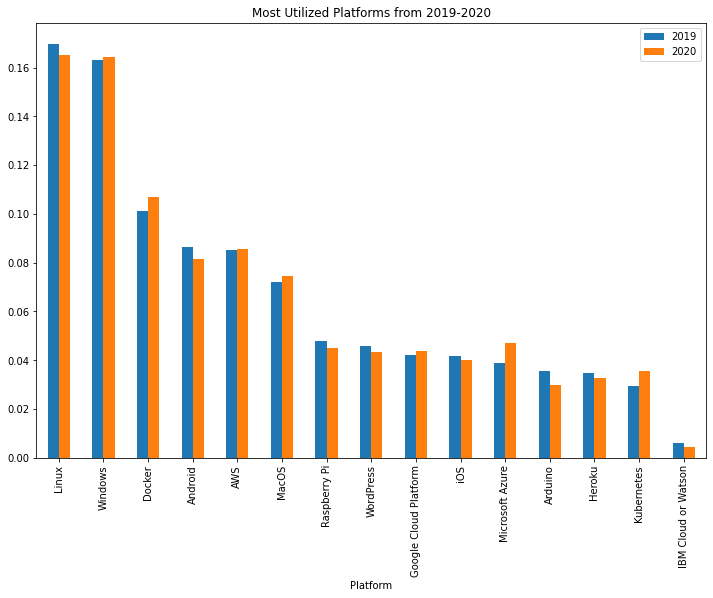

In [42]:
ax = (plats_19_20/plats_19_20.sum()).plot(kind='bar', title='Most Utilized Platforms from 2019-2020', figsize=(12,8))
ax.legend(['2019', '2020'])

Now we can draw some better conclusions! The bar plot for 2017-2018 corresponds to our 4-year view, but there is a significant change in 2019 and 2020. It appears that server and cloud computing has overtaken mobile and IoT devices. Now we can accurately forecast changes within the community!